In [26]:
library(MASS)
install.packages("nnet")
library(nnet)
install.packages("caret")
library(caret)
library(plotmo)
library(readr)
library(faraway)
library(ggplot2)
library(glmnet)
library(e1071)
install.packages("randomForest")
library(randomForest)

Installing package into 'C:/Users/36961/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'nnet' is in use and will not be installed"Installing package into 'C:/Users/36961/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'caret' is in use and will not be installed"Installing package into 'C:/Users/36961/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'randomForest' is in use and will not be installed"

# Load Data and Final Clean

In [29]:
df <- read.csv(file="cleaned_data_0330.csv",sep=",",header=TRUE)
df = df[,-1]
colnames(df)
dim(df)

[1] "X1st_Term_Funding"                 "X2nd_Term_Funding"                
 [3] "X3rd_Term_Funding"                 "X4th_Term_Funding"                
 [5] "Start_year"                        "Start_age"                        
 [7] "College"                           "Age"                              
 [9] "Degree"                            "Gender"                           
[11] "funding_indicator"                 "ID"                               
[13] "Citizenship"                       "Major_id"                         
[15] "Major"                             "net_cost"                         
[17] "Program"                           "Prep.Level"                       
[19] "Total.Charges"                     "Total.Funding.Amount"             
[21] "Y"                                 "PC1"                              
[23] "PC2"                               "PC3"                              
[25] "Term.1.GPA"                        "Term.2.GPA"                       
[27] "Term.3.GPA"                        "Term.4.GPA"                       
[29] "Term.5.GPA"                        "Term.6.GPA"                       
[31] "Term.7.GPA"                        "Term.8.GPA"                       
[33] "gap_indicator"                     "GPA_trend"                        
[35] "Valid.term"                        "Average_GPA"                      
[37] "academic_period"                   "s_College"                        
[39] "s_Citizenship"                     "SAPC1"                            
[41] "SAPC2"                             "SAPC3"                            
[43] "Average.Precol.GPA"                "GMAT.Score"                       
[45] "GRE.Combined.General.Write.Score"  "GRE.Combined.Quantitative.Score"  
[47] "GRE.Combined.General.Verbal.Score"

[1] 2470   47

In [30]:
colnames(df)

[1] "X1st_Term_Funding"                 "X2nd_Term_Funding"                
 [3] "X3rd_Term_Funding"                 "X4th_Term_Funding"                
 [5] "Start_year"                        "Start_age"                        
 [7] "College"                           "Age"                              
 [9] "Degree"                            "Gender"                           
[11] "funding_indicator"                 "ID"                               
[13] "Citizenship"                       "Major_id"                         
[15] "Major"                             "net_cost"                         
[17] "Program"                           "Prep.Level"                       
[19] "Total.Charges"                     "Total.Funding.Amount"             
[21] "Y"                                 "PC1"                              
[23] "PC2"                               "PC3"                              
[25] "Term.1.GPA"                        "Term.2.GPA"                       
[27] "Term.3.GPA"                        "Term.4.GPA"                       
[29] "Term.5.GPA"                        "Term.6.GPA"                       
[31] "Term.7.GPA"                        "Term.8.GPA"                       
[33] "gap_indicator"                     "GPA_trend"                        
[35] "Valid.term"                        "Average_GPA"                      
[37] "academic_period"                   "s_College"                        
[39] "s_Citizenship"                     "SAPC1"                            
[41] "SAPC2"                             "SAPC3"                            
[43] "Average.Precol.GPA"                "GMAT.Score"                       
[45] "GRE.Combined.General.Write.Score"  "GRE.Combined.Quantitative.Score"  
[47] "GRE.Combined.General.Verbal.Score"

In [31]:
unique(df$Citizenship)

[1] China                        White                       
 [3] Asia                         Unknown                     
 [5] India                        Europe                      
 [7] Hispanic or Latino           Black or African American   
 [9] Asian                        Africa                      
[11] Other International Students
11 Levels: Africa Asia Asian Black or African American China ... White

Scale and center some variables:

In [32]:
mean_age = mean(df$Start_age)
sd_age = sd(df$Start_age)
df$s_start_age = (df$Start_age - mean_age)/sd_age
mean_net = mean(df$net_cost)
sd_net = sd(df$net_cost)
df$s_net_cost = (df$net_cost - mean_net)/sd_net
mean_year = mean(df$Start_year)
sd_year = sd(df$Start_year)
df$s_start_year = (df$Start_year - mean_year)/sd_year

In [33]:
av_net_cost = ifelse(df$Valid.term > 0, df$net_cost / df$Valid.term, df$net_cost)
av_mean_net = mean(av_net_cost)
av_sd_net = sd(av_net_cost)
df$avs_net_cost = (av_net_cost - av_mean_net)/av_sd_net

In [34]:
mean_SAPC1 = mean(df$SAPC1)
sd_SAPC1 = sd(df$SAPC1)
df$s_SAPC1 = (df$SAPC1 - mean_SAPC1)/sd_SAPC1
mean_SAPC2 = mean(df$SAPC2)
sd_SAPC2 = sd(df$SAPC2)
df$s_SAPC2 = (df$SAPC2 - mean_SAPC2)/sd_SAPC2
mean_SAPC3 = mean(df$SAPC3)
sd_SAPC3 = sd(df$SAPC3)
df$s_SAPC3 = (df$SAPC3 - mean_SAPC3)/sd_SAPC3

In [35]:
mean_Average.Precol.GPA = mean(df$Average.Precol.GPA)
sd_Average.Precol.GPA = sd(df$Average.Precol.GPA)
df$s_Average.Precol.GPA = (df$Average.Precol.GPA - mean_Average.Precol.GPA)/sd_Average.Precol.GPA

In [36]:
mean_GRE.Combined.General.Write.Score = mean(df$GRE.Combined.General.Write.Score)
sd_GRE.Combined.General.Write.Score = sd(df$GRE.Combined.General.Write.Score)
df$s_GRE.Combined.General.Write.Score = (df$GRE.Combined.General.Write.Score - mean_GRE.Combined.General.Write.Score)/sd_GRE.Combined.General.Write.Score

In [37]:
mean_GRE.Combined.Quantitative.Score = mean(df$GRE.Combined.Quantitative.Score)
sd_GRE.Combined.Quantitative.Score = sd(df$GRE.Combined.Quantitative.Score)
df$s_GRE.Combined.Quantitative.Score = (df$GRE.Combined.Quantitative.Score - mean_GRE.Combined.Quantitative.Score)/sd_GRE.Combined.Quantitative.Score

In [38]:
mean_GRE.Combined.General.Verbal.Score = mean(df$GRE.Combined.General.Verbal.Score)
sd_GRE.Combined.General.Verbal.Score = sd(df$GRE.Combined.General.Verbal.Score)
df$s_GRE.Combined.General.Verbal.Score = (df$GRE.Combined.General.Verbal.Score - mean_GRE.Combined.General.Verbal.Score)/sd_GRE.Combined.General.Verbal.Score


In [39]:
mean_GMAT.Score = mean(df$GMAT.Score)
sd_GMAT.Score = sd(df$GMAT.Score)
df$s_GMAT.Score = (df$GMAT.Score - mean_GMAT.Score)/sd_GMAT.Score

## Seperate by School

Different Schools

In [40]:
schools = levels(factor(df$College))

In [41]:
Harpur_df = df[df$College %in% schools[1:4],]
Management_df = df[df$College=="GD Management",]
Nursing_df = df[df$College=="GD Nursing",]
Watson_df = df[df$College=="GD Watson",]

In [42]:
unique(Harpur_df$Major)

[1] Translation Studies            Chemistry                     
 [3] Behavioral Neuroscience        Cognitive Psychology          
 [5] Physics                        Mathematics                   
 [7] Comparative Literature         Educational Theory and Practic
 [9] Philosophy Interpretation and  Biological Sciences           
[11] English                        Materials Science and Engineer
[13] History                        Anthropology                  
[15] Sociology                      Material Sci and Eng-Engineerg
[17] Clinical Psychology            Economics                     
[19] Geology                        Philosophy SPEL               
[21] Political Science              Community and Public Affairs  
[23] Art History                    Materials Science and Engr    
[25] Biological Sciences EEB        X Geology                     
[27] Art History Combined MA PhD    Mechanical Engineering        
[29] Mathematics/Economics         
45 Levels: Anthropology Art History ... XGerontolog Clin Nurse Special

In [43]:
harpur_sciences <- c("Chemistry", "Behavioral Neuroscience","Cognitive Psychology","Physics","Mathematics",
                     "Biological Sciences","Materials Science and Engineer","Material Sci and Eng-Engineerg",
                     "Clinical Psychology","Economics","Geology","Political Science","Materials Science and Engr",
                     "Biological Sciences EEB", "X Geology","Mathematics/Economics")
harpur_arts <- c("Comparative Literature","Translation Studies","Educational Theory and Practic",
                 "Philosophy Interpretation and", "English","History","Anthropology","Sociology","Philosophy SPEL",
                 "Community and Public Affairs","Art History","Art History Combined MA PhD")

In [44]:
Harpur_sciences = Harpur_df[Harpur_df$Major %in% harpur_sciences,]
Harpur_arts = Harpur_df[Harpur_df$Major %in% harpur_arts,]

In [45]:
Harpur_sciences <- within(Harpur_sciences, Citizenship <- relevel(Citizenship, ref = "White"))
Harpur_arts <- within(Harpur_arts, Citizenship <- relevel(Citizenship, ref = "White"))
Management_df <- within(Management_df, Citizenship <- relevel(Citizenship, ref = "White"))
Watson_df <- within(Watson_df, Citizenship <- relevel(Citizenship, ref = "White"))
Nursing_df <- within(Nursing_df, Citizenship <- relevel(Citizenship, ref = "White"))

In [46]:
dim(Harpur_sciences)[1]
dim(Harpur_arts)[1]
dim(Harpur_df)[1]

[1] 861

[1] 918

[1] 1780

In [47]:
a_n = dim(Harpur_sciences)[1]
a_1 = sum(Harpur_sciences$Y)
a_0 = a_n - a_1
b_n = dim(Harpur_arts)[1]
b_1 = sum(Harpur_arts$Y)
b_0 = b_n - b_1
c_n = dim(Management_df)[1]
c_1 = sum(Management_df$Y)
c_0 = c_n - c_1
d_n = dim(Nursing_df)[1]
d_1 = sum(Nursing_df$Y)
d_0 = d_n - d_1
e_n = dim(Watson_df)[1]
e_1 = sum(Watson_df$Y)
e_0 = e_n - e_1
School = c("Harpur sciences","Harpur_arts","SOM","Nursing","Watson")
sch_total = c(a_n,b_n,c_n,d_n,e_n)
succ_total = c(a_1,b_1,c_1,d_1,e_1)
unsucc_total = c(a_0,b_0,c_0,d_0,e_0)
data.frame("School"=School,"Total"=sch_total,"Successful Graduates"=succ_total,"Unsuccessful Graduates"=unsucc_total)

School,Total,Successful.Graduates,Unsuccessful.Graduates
Harpur sciences,861,542,319
Harpur_arts,918,534,384
SOM,58,38,20
Nursing,117,72,45
Watson,515,343,172


In [60]:
Watson_df[which(Watson_df$Y==1), ]$GRE.Combined.General.Verbal.Score

[1] 154.9181 158.0000 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
  [9] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [17] 157.0000 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [25] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [33] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [41] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [49] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [57] 154.9181 165.0000 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [65] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [73] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [81] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
 [89] 154.9181 154.9181 154.9181 158.0000 154.9181 154.9181 153.0000 154.9181
 [97] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
[105] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
[113] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
[121] 154.9181 154.9181 154.9181 151.0000 154.9181 154.9181 154.9181 154.9181
[129] 154.9181 154.9181 154.9181 140.0000 154.9181 154.9181 154.9181 154.9181
[137] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
[145] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
[153] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
[161] 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181 154.9181
[169] 154.9181 154.9181 138.0000 154.9181 154.9181 154.9181 154.9181 154.9181
[177] 154.9181 154.9181 134.0000 160.0000 154.0000 154.9181 155.0000 150.0000
[185] 140.0000 154.9181 153.0000 145.0000 154.9181 154.9181 154.9181 139.0000
[193] 147.0000 139.0000 153.0000 139.0000 158.0000 153.0000 140.0000 130.0000
[201] 139.0000 154.9181 138.0000 138.0000 164.0000 139.0000 133.0000 134.0000
[209] 137.0000 149.0000 135.0000 154.9181 151.0000 134.0000 157.0000 149.0000
[217] 146.0000 158.0000 146.0000 161.0000 151.0000 137.0000 138.0000 152.0000
[225] 152.0000 139.0000 152.0000 138.0000 145.0000 151.0000 151.0000 154.9181
[233] 134.0000 139.0000 154.9181 132.0000 135.0000 154.9181 156.0000 138.0000
[241] 130.0000 154.9181 145.0000 154.0000 144.0000 156.0000 149.0000 152.0000
[249] 137.0000 148.0000 151.0000 150.0000 144.0000 140.0000 154.0000 158.0000
[257] 151.0000 155.0000 154.9181 147.0000 143.0000 154.9181 154.9181 154.9181
[265] 142.0000 140.0000 154.0000 157.0000 155.0000 143.0000 156.0000 132.0000
[273] 143.0000 144.0000 154.9181 146.0000 157.0000 157.0000 152.0000 152.0000
[281] 155.0000 156.0000 135.0000 150.0000 152.0000 150.0000 135.0000 154.9181
[289] 145.0000 139.0000 135.0000 166.0000 142.0000 149.0000 141.0000 138.0000
[297] 144.0000 157.0000 155.0000 150.0000 159.0000 140.0000 143.0000 154.9181
[305] 163.0000 153.0000 148.0000 155.0000 137.0000 136.0000 136.0000 144.0000
[313] 136.0000 152.0000 154.9181 152.0000 146.0000 145.0000 147.0000 162.0000
[321] 155.0000 149.0000 139.0000 149.0000 138.0000 132.0000 151.0000 152.0000
[329] 143.0000 159.0000 140.0000 137.0000 150.0000 152.0000 142.0000 146.0000
[337] 150.0000 145.0000 154.9181 143.0000 154.9181 154.9181 137.0000

# Harpur Sciences Analysis

Won't use Degree column since it does not accurately show the student's major

<b> Logistic regression model:

In [22]:
log_mod_h_s = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+
                factor(gap_indicator)+GPA_trend+s_start_year,
                data=Harpur_sciences,family="binomial")
summary(log_mod_h_s)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Harpur_sciences)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2437  -0.9592   0.5585   0.8648   2.1207  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                     -0.436360   0.260852  -1.673
s_start_age                                      0.150515   0.149366   1.008
factor(Gender)Male                              -0.004027   0.165234  -0.024
factor(funding_indicator)1                       1.295113   0.256252   5.054
factor(Citizenship)Africa                        0.978364   0.479821   2.039
factor(Citizenship)Asia                

<b> Significant Variables of logistic regression model: 

In [23]:
round(summary(log_mod_h_s)$coeff[which(summary(log_mod_h_s)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.29511,0.00000
factor(Citizenship)Africa,0.97836,0.04145
factor(Citizenship)China,0.53363,0.03350
GPA_trend,1.07370,0.01182
s_start_year,-1.34129,0.00000


Things we need
-  Run AIC/BIC stepwise model selection for Harpur and summarize results
-  Repeat for the other schools

<b> Both AIC:

In [24]:
library('MASS')
log_mod_h_s_aic = stepAIC(log_mod_h_s, direction = 'both')

Start:  AIC=997.96
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance     AIC
- factor(Citizenship)                 10   970.03  994.03
- factor(Gender)                       1   953.96  995.96
- s_GRE.Combined.Quantitative.Score    1   953.96  995.96
- s_GRE.Combined.General.Write.Score   1   954.02  996.02
- s_GRE.Combined.General.Verbal.Score  1   954.07  996.07
- s_Average.Precol.GPA                 1   954.27  996.27
- s_start_age                          1   954.98  996.98
<none>                                     953.96  997.96
- avs_net_cost                         1   956.21  998.21
- factor(gap_indicator)                1   957.71  999.71
- GPA_trend                            

<b> Significant variables both AIC selects:

In [25]:
round(summary(log_mod_h_s_aic)$coeff[which(summary(log_mod_h_s_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.24768,0.00000
GPA_trend,0.96399,0.01727
s_start_year,-1.35272,0.00000


<b> Both BIC

In [26]:
log_mod_h_s_bic = stepAIC(log_mod_h_s, direction = "both", k = log(a_n))

Start:  AIC=1102.64
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   970.03 1051.1
- factor(Gender)                       1   953.96 1095.9
- s_GRE.Combined.Quantitative.Score    1   953.96 1095.9
- s_GRE.Combined.General.Write.Score   1   954.02 1095.9
- s_GRE.Combined.General.Verbal.Score  1   954.07 1096.0
- s_Average.Precol.GPA                 1   954.27 1096.2
- s_start_age                          1   954.98 1096.9
- avs_net_cost                         1   956.21 1098.1
- factor(gap_indicator)                1   957.71 1099.6
<none>                                     953.96 1102.6
- GPA_trend                            1   960.96


Step:  AIC=1011.54
Y ~ factor(funding_indicator) + avs_net_cost + GPA_trend + s_start_year

                                      Df Deviance    AIC
- avs_net_cost                         1   980.78 1007.8
- GPA_trend                            1   983.93 1011.0
<none>                                     977.75 1011.5
+ factor(gap_indicator)                1   974.64 1015.2
+ s_GRE.Combined.General.Write.Score   1   975.85 1016.4
+ s_start_age                          1   975.89 1016.4
+ s_GRE.Combined.Quantitative.Score    1   977.16 1017.7
+ s_GRE.Combined.General.Verbal.Score  1   977.74 1018.3
+ s_Average.Precol.GPA                 1   977.75 1018.3
+ factor(Gender)                       1   977.75 1018.3
- factor(funding_indicator)            1  1003.94 1031.0
+ factor(Citizenship)                 10   959.41 1060.8
- s_start_year                         1  1119.26 1146.3

Step:  AIC=1007.81
Y ~ factor(funding_indicator) + GPA_trend + s_start_year

                               

<b> Significant variables both BIC selects:

In [27]:
round(summary(log_mod_h_s_bic)$coeff[which(summary(log_mod_h_s_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.18085,0
s_start_year,-1.38659,0


# Harpur Arts Analysis

<b> Logistic regression model:

In [28]:
log_mod_h_a = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Harpur_arts,family="binomial")
summary(log_mod_h_a)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Harpur_arts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0747  -1.1505   0.7573   0.9953   1.7514  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                     -0.310246   0.173581  -1.787
s_start_age                                      0.107226   0.071319   1.503
factor(Gender)Male                               0.031559   0.145284   0.217
factor(funding_indicator)1                       0.714213   0.172699   4.136
factor(Citizenship)Africa                       -0.470445   0.536178  -0.877
factor(Citizenship)Asia                    

<b> Significant Variables of logistic regression model: 

In [29]:
round(summary(log_mod_h_a)$coeff[which(summary(log_mod_h_a)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.71421,0.00004
factor(Citizenship)Asia,0.62205,0.00976
s_Average.Precol.GPA,0.18882,0.02234
s_start_year,-0.48137,0.00000


<b> Both AIC:

In [30]:
log_mod_h_a_aic = stepAIC(log_mod_h_a, direction = 'both')

Start:  AIC=1205.55
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   1173.6 1197.6
- avs_net_cost                         1   1161.6 1203.6
- factor(Gender)                       1   1161.6 1203.6
- s_GRE.Combined.Quantitative.Score    1   1162.0 1204.0
- s_GRE.Combined.General.Write.Score   1   1162.2 1204.2
- factor(gap_indicator)                1   1162.3 1204.3
<none>                                     1161.5 1205.5
- GPA_trend                            1   1163.6 1205.6
- s_start_age                          1   1163.8 1205.8
- s_GRE.Combined.General.Verbal.Score  1   1164.4 1206.4
- s_Average.Precol.GPA                 1   1167.4

<b> Significant variables both AIC selects:

In [31]:
round(summary(log_mod_h_a_aic)$coeff[which(summary(log_mod_h_a_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.65119,0.00006
s_Average.Precol.GPA,0.17695,0.02501
s_start_year,-0.47224,0.00000


<b> Both BIC

In [32]:
log_mod_h_a_bic = stepAIC(log_mod_h_a, direction = "both", k = log(b_n))

Start:  AIC=1311.64
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   1173.6 1255.5
- avs_net_cost                         1   1161.6 1304.8
- factor(Gender)                       1   1161.6 1304.9
- s_GRE.Combined.Quantitative.Score    1   1162.0 1305.3
- s_GRE.Combined.General.Write.Score   1   1162.2 1305.4
- factor(gap_indicator)                1   1162.3 1305.6
- GPA_trend                            1   1163.6 1306.9
- s_start_age                          1   1163.8 1307.1
- s_GRE.Combined.General.Verbal.Score  1   1164.4 1307.7
- s_Average.Precol.GPA                 1   1167.4 1310.7
<none>                                     1161.5


Step:  AIC=1215.78
Y ~ factor(funding_indicator) + s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_start_year

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   1186.0 1213.3
<none>                                     1181.7 1215.8
- s_GRE.Combined.General.Verbal.Score  1   1190.9 1218.2
+ s_GRE.Combined.General.Write.Score   1   1178.1 1219.0
+ s_GRE.Combined.Quantitative.Score    1   1179.4 1220.3
+ s_start_age                          1   1180.0 1221.0
+ GPA_trend                            1   1180.3 1221.2
+ factor(gap_indicator)                1   1180.8 1221.7
+ avs_net_cost                         1   1181.7 1222.6
+ factor(Gender)                       1   1181.7 1222.6
- factor(funding_indicator)            1   1197.1 1224.4
- s_start_year                         1   1231.0 1258.3
+ factor(Citizenship)                 10   1168.5 1270.8

Step:  AIC=1213.29
Y ~ factor(funding_indicator) + s_GRE.Combined.Gen

<b> Significant variables both BIC selects:

In [33]:
round(summary(log_mod_h_a_bic)$coeff[which(summary(log_mod_h_a_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,0.64293,0.00006
s_GRE.Combined.General.Verbal.Score,-0.54242,0.03417
s_start_year,-0.48063,0.00000


# Management Analysis

<b> Logistic regression model:

In [154]:
log_mod_m = glm(Y~s_start_age+factor(Gender)+factor(Citizenship)+s_GMAT.Score
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Management_df,family="binomial")
summary(log_mod_m)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(Citizenship) + 
    s_GMAT.Score + avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year, family = "binomial", 
    data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1745  -0.4835   0.3336   0.7903   1.4576  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              1.64214    1.27631   1.287    0.198
s_start_age                              0.51754    0.77735   0.666    0.506
factor(Gender)Male                      -1.39985    0.88531  -1.581    0.114
factor(Citizenship)Asia                  0.67052    1.19547   0.561    0.575
factor(Citizenship)Asian                 1.22060    1.79593   0.680    0.497
factor(Citizenship)China                 0.45678    1.

<b> Significant Variables of logistic regression model: 

In [155]:
round(summary(log_mod_m)$coeff[which(summary(log_mod_m)$coef[,4] <= .05),c(1,4)],5)

Estimate,Pr(>|z|)


<b> Both AIC:

In [156]:
log_mod_m_aic= stepAIC(log_mod_m, direction = 'both')

Start:  AIC=89.15
Y ~ s_start_age + factor(Gender) + factor(Citizenship) + s_GMAT.Score + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                  7   52.404 76.404
- s_start_year                         1   51.188 87.188
- s_GRE.Combined.General.Verbal.Score  1   51.588 87.588
- s_start_age                          1   51.601 87.601
- s_GMAT.Score                         1   51.673 87.673
- GPA_trend                            1   52.201 88.201
- s_Average.Precol.GPA                 1   52.674 88.674
- avs_net_cost                         1   52.896 88.896
<none>                                     51.148 89.148
- factor(gap_indicator)                1   53.758 89.758
- factor(Gender)                       1   53.861 89.861
- s_GRE.Comb

                                      Df Deviance    AIC
<none>                                     58.518 68.518
+ avs_net_cost                         1   56.887 68.887
+ factor(Gender)                       1   57.102 69.102
- s_GRE.Combined.Quantitative.Score    1   61.508 69.508
+ s_Average.Precol.GPA                 1   57.857 69.857
+ s_start_year                         1   57.930 69.930
- factor(gap_indicator)                1   62.051 70.051
- GPA_trend                            1   62.239 70.239
+ s_start_age                          1   58.259 70.259
+ s_GMAT.Score                         1   58.394 70.394
+ s_GRE.Combined.General.Verbal.Score  1   58.517 70.517
- s_GRE.Combined.General.Write.Score   1   66.143 74.143
+ factor(Citizenship)                  7   57.034 81.034


<b> Significant variables both AIC selects:

In [157]:
summary(log_mod_m_aic)


Call:
glm(formula = Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    factor(gap_indicator) + GPA_trend, family = "binomial", data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1061  -0.5955   0.7423   0.8650   1.0392  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                           0.7832     0.3351   2.337   0.0194 *
s_GRE.Combined.General.Write.Score    2.2017     1.1743   1.875   0.0608 .
s_GRE.Combined.Quantitative.Score     6.4343     4.5623   1.410   0.1584  
factor(gap_indicator)1               16.8160  1765.0790   0.010   0.9924  
GPA_trend                             2.8072     1.6378   1.714   0.0865 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.726  on 57  degrees of freedom
Residual deviance: 58.518  on 53  degrees of freedom
AIC: 68.

<b> Both BIC:

In [158]:
log_mod_m_bic = stepAIC(log_mod_m, direction = "both", k = log(c_n))

Start:  AIC=128.3
Y ~ s_start_age + factor(Gender) + factor(Citizenship) + s_GMAT.Score + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                  7   52.404 101.13
- s_start_year                         1   51.188 124.28
- s_GRE.Combined.General.Verbal.Score  1   51.588 124.68
- s_start_age                          1   51.601 124.69
- s_GMAT.Score                         1   51.673 124.76
- GPA_trend                            1   52.201 125.29
- s_Average.Precol.GPA                 1   52.674 125.76
- avs_net_cost                         1   52.896 125.98
- factor(gap_indicator)                1   53.758 126.85
- factor(Gender)                       1   53.861 126.95
- s_GRE.Combined.Quantitative.Score    1   54.670 127.76
- s_GRE.Comb


Step:  AIC=78.82
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    factor(gap_indicator) + GPA_trend

                                      Df Deviance     AIC
- s_GRE.Combined.Quantitative.Score    1   61.508  77.750
- factor(gap_indicator)                1   62.051  78.293
- GPA_trend                            1   62.239  78.480
<none>                                     58.518  78.820
+ avs_net_cost                         1   56.887  81.250
+ factor(Gender)                       1   57.102  81.465
+ s_Average.Precol.GPA                 1   57.857  82.220
+ s_start_year                         1   57.930  82.293
- s_GRE.Combined.General.Write.Score   1   66.143  82.384
+ s_start_age                          1   58.259  82.622
+ s_GMAT.Score                         1   58.394  82.757
+ s_GRE.Combined.General.Verbal.Score  1   58.517  82.880
+ factor(Citizenship)                  7   57.034 105.759

Step:  AIC=77.75
Y ~ s_GRE.Combined.General.Write.Sc

<b> Significant variables both BIC selects:

In [159]:
round(summary(log_mod_m_bic)$coeff[which(summary(log_mod_m_bic)$coef[,4] <= .05),c(1,4)],5)
summary(log_mod_m_bic)

Estimate Pr(>|z|) 
 0.85495  0.01084


Call:
glm(formula = Y ~ s_GRE.Combined.General.Write.Score + factor(gap_indicator) + 
    GPA_trend, family = "binomial", data = Management_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1667  -0.8056   0.7367   0.8419   1.5918  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                           0.8550     0.3356   2.548   0.0108 *
s_GRE.Combined.General.Write.Score    1.2446     0.6510   1.912   0.0559 .
factor(gap_indicator)1               17.2275  1653.2598   0.010   0.9917  
GPA_trend                             2.9614     1.5818   1.872   0.0612 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 74.726  on 57  degrees of freedom
Residual deviance: 61.508  on 54  degrees of freedom
AIC: 69.508

Number of Fisher Scoring iterations: 16


# Nursing Analysis

<b> Logistic regression model:

In [40]:
log_mod_n = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Nursing_df,family="binomial")
summary(log_mod_n)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Nursing_df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.33232  -0.93314   0.00028   0.92340   1.75450  

Coefficients:
                                               Estimate Std. Error z value
(Intercept)                                   5.458e-01  5.240e-01   1.042
s_start_age                                  -1.609e-01  1.700e-01  -0.947
factor(Gender)Male                            1.380e-01  7.476e-01   0.185
factor(funding_indicator)1                    6.545e-01  5.232e-01   1.251
factor(Citizenship)Africa                     2.039e+01  1.511e+04   0.001
factor(Citizenship)Asia                       

<b> Significant Variables of logistic regression model: 

In [41]:
round(summary(log_mod_n)$coeff[which(summary(log_mod_n)$coef[,4] <= .05),c(1,4)],5)

Estimate Pr(>|z|) 
-0.83314  0.00808

<b> Both AIC:

In [42]:
log_mod_n_aic= stepAIC(log_mod_n, direction = 'both')

Start:  AIC=156.63
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Citizenship)                  7   127.47 151.47
- avs_net_cost                         1   118.64 154.64
- factor(Gender)                       1   118.67 154.67
- GPA_trend                            1   118.72 154.72
- factor(gap_indicator)                1   119.35 155.35
- s_start_age                          1   119.54 155.54
- s_GRE.Combined.General.Verbal.Score  1   119.92 155.92
- factor(funding_indicator)            1   120.24 156.24
- s_GRE.Combined.General.Write.Score   1   120.36 156.36
<none>                                     118.63 156.63
- s_Average.Precol.GPA                 1   121.58 157.58
- s_GRE.Combined.Quantitative.Score    1   126.49 162.49
- s_start_year                         1   128.54 164.54


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=151.46
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Gender)                       1   127.47 149.47
- avs_net_cost                         1   127.47 149.47
- GPA_trend                            1   127.65 149.65
- s_start_age                          1   127.84 149.84
- s_Average.Precol.GPA                 1   129.12 151.12
- factor(funding_indicator)            1   129.19 151.19
<none>                                     127.47 151.47
- s_GRE.Combined.General.Verbal.Score  1   129.50 151.50
- factor(gap_indicator)                1   129.54 151.54
- s_GRE.Combined.General.Write.Score   1   129.69 151.69
+ factor(Citizenship)                  7   118.63 156.63
- s_GRE.Combined.Quantitative.Score    1   137.11 159.11
- s_start_year                         1   138.33 160.33


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=149.46
Y ~ s_start_age + factor(funding_indicator) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- avs_net_cost                         1   127.47 147.47
- GPA_trend                            1   127.65 147.65
- s_start_age                          1   127.84 147.84
- factor(funding_indicator)            1   129.20 149.20
- s_Average.Precol.GPA                 1   129.25 149.25
<none>                                     127.47 149.47
- factor(gap_indicator)                1   129.55 149.55
- s_GRE.Combined.General.Verbal.Score  1   129.57 149.57
- s_GRE.Combined.General.Write.Score   1   129.84 149.84
+ factor(Gender)                       1   127.47 151.47
+ factor(Citizenship)                  7   118.67 154.67
- s_GRE.Combined.Quantitative.Score    1   137.11 157.11
- s_start_year                         1   138.37 158.37


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=147.47
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- GPA_trend                            1   127.65 145.65
- s_start_age                          1   127.85 145.85
- s_Average.Precol.GPA                 1   129.28 147.28
- factor(funding_indicator)            1   129.31 147.31
<none>                                     127.47 147.47
- factor(gap_indicator)                1   129.55 147.55
- s_GRE.Combined.General.Verbal.Score  1   129.57 147.57
- s_GRE.Combined.General.Write.Score   1   129.84 147.84
+ avs_net_cost                         1   127.47 149.47
+ factor(Gender)                       1   127.47 149.47
+ factor(Citizenship)                  7   118.68 152.68
- s_GRE.Combined.Quantitative.Score    1   137.12 155.12
- s_start_year                         1   138.83 156.83


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=145.65
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_start_age                          1   127.98 143.98
- factor(funding_indicator)            1   129.54 145.54
<none>                                     127.65 145.65
- s_Average.Precol.GPA                 1   129.69 145.69
- s_GRE.Combined.General.Verbal.Score  1   129.77 145.77
- factor(gap_indicator)                1   129.96 145.96
- s_GRE.Combined.General.Write.Score   1   130.02 146.02
+ GPA_trend                            1   127.47 147.47
+ avs_net_cost                         1   127.65 147.65
+ factor(Gender)                       1   127.65 147.65
+ factor(Citizenship)                  7   118.77 150.77
- s_GRE.Combined.Quantitative.Score    1   137.22 153.22
- s_start_year                         1   138.84 154.84


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.98
Y ~ factor(funding_indicator) + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   129.87 143.87
<none>                                     127.98 143.98
- factor(gap_indicator)                1   130.11 144.11
- s_GRE.Combined.General.Verbal.Score  1   130.36 144.36
- factor(funding_indicator)            1   130.59 144.59
- s_GRE.Combined.General.Write.Score   1   130.65 144.65
+ s_start_age                          1   127.65 145.65
+ GPA_trend                            1   127.85 145.85
+ factor(Gender)                       1   127.97 145.97
+ avs_net_cost                         1   127.97 145.97
+ factor(Citizenship)                  7   119.69 149.69
- s_GRE.Combined.Quantitative.Score    1   138.42 152.42
- s_start_year                         1   138.93 152.93


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.87
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(gap_indicator)                1   131.52 143.52
<none>                                     129.87 143.87
+ s_Average.Precol.GPA                 1   127.98 143.98
- factor(funding_indicator)            1   132.31 144.31
- s_GRE.Combined.General.Verbal.Score  1   132.39 144.39
- s_GRE.Combined.General.Write.Score   1   133.02 145.02
+ GPA_trend                            1   129.52 145.52
+ s_start_age                          1   129.69 145.69
+ factor(Gender)                       1   129.81 145.81
+ avs_net_cost                         1   129.84 145.84
+ factor(Citizenship)                  7   122.74 150.74
- s_GRE.Combined.Quantitative.Score    1   140.43 152.43
- s_start_year                         1   142.03 154.03


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.52
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(funding_indicator)            1   133.16 143.16
<none>                                     131.52 143.52
+ factor(gap_indicator)                1   129.87 143.87
- s_GRE.Combined.General.Verbal.Score  1   134.08 144.08
+ s_Average.Precol.GPA                 1   130.11 144.11
+ GPA_trend                            1   130.94 144.94
+ factor(Gender)                       1   131.44 145.44
+ s_start_age                          1   131.45 145.45
+ avs_net_cost                         1   131.50 145.50
- s_GRE.Combined.General.Write.Score   1   135.62 145.62
+ factor(Citizenship)                  7   123.30 149.30
- s_GRE.Combined.Quantitative.Score    1   143.34 153.34
- s_start_year                         1   143.37 153.37


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=143.16
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
<none>                                     133.16 143.16
+ factor(funding_indicator)            1   131.52 143.52
+ s_Average.Precol.GPA                 1   131.74 143.74
- s_GRE.Combined.General.Verbal.Score  1   136.02 144.02
+ factor(gap_indicator)                1   132.31 144.31
+ GPA_trend                            1   132.63 144.63
+ s_start_age                          1   132.70 144.70
+ avs_net_cost                         1   133.10 145.10
+ factor(Gender)                       1   133.13 145.13
- s_GRE.Combined.General.Write.Score   1   137.34 145.34
+ factor(Citizenship)                  7   125.37 149.37
- s_GRE.Combined.Quantitative.Score    1   144.34 152.34
- s_start_year                         1   144.52 152.52


<b> Significant variables both AIC selects:

In [43]:
round(summary(log_mod_n_aic)$coeff[which(summary(log_mod_n_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),0.59425,0.02246
s_start_year,-0.76541,0.00448


<b> Both BIC:

In [44]:
log_mod_n_bic = stepAIC(log_mod_n, direction = "both", k = log(d_n))

Start:  AIC=209.11
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Citizenship)                  7   127.47 184.61
- avs_net_cost                         1   118.64 204.36
- factor(Gender)                       1   118.67 204.38
- GPA_trend                            1   118.72 204.43
- factor(gap_indicator)                1   119.35 205.07
- s_start_age                          1   119.54 205.26
- s_GRE.Combined.General.Verbal.Score  1   119.92 205.64
- factor(funding_indicator)            1   120.24 205.96
- s_GRE.Combined.General.Write.Score   1   120.36 206.08
- s_Average.Precol.GPA                 1   121.58 207.30
<none>                                     118.63 209.11
- s_GRE.Combined.Quantitative.Score    1   126.49 212.21
- s_start_year                         1   128.54 214.26


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=184.61
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(Gender)                       1   127.47 179.85
- avs_net_cost                         1   127.47 179.85
- GPA_trend                            1   127.65 180.03
- s_start_age                          1   127.84 180.22
- s_Average.Precol.GPA                 1   129.12 181.50
- factor(funding_indicator)            1   129.19 181.58
- s_GRE.Combined.General.Verbal.Score  1   129.50 181.88
- factor(gap_indicator)                1   129.54 181.92
- s_GRE.Combined.General.Write.Score   1   129.69 182.07
<none>                                     127.47 184.61
- s_GRE.Combined.Quantitative.Score    1   137.11 189.49
- s_start_year                         1   138.33 190.71
+ factor(Citizenship)                  7   118.63 209.11


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=179.85
Y ~ s_start_age + factor(funding_indicator) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- avs_net_cost                         1   127.47 175.09
- GPA_trend                            1   127.65 175.27
- s_start_age                          1   127.84 175.46
- factor(funding_indicator)            1   129.20 176.82
- s_Average.Precol.GPA                 1   129.25 176.88
- factor(gap_indicator)                1   129.55 177.17
- s_GRE.Combined.General.Verbal.Score  1   129.57 177.19
- s_GRE.Combined.General.Write.Score   1   129.84 177.46
<none>                                     127.47 179.85
+ factor(Gender)                       1   127.47 184.61
- s_GRE.Combined.Quantitative.Score    1   137.11 184.73
- s_start_year                         1   138.37 186.00
+ factor(Citizenship)                  7   118.67 204.38


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=175.09
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- GPA_trend                            1   127.65 170.51
- s_start_age                          1   127.85 170.71
- s_Average.Precol.GPA                 1   129.28 172.14
- factor(funding_indicator)            1   129.31 172.17
- factor(gap_indicator)                1   129.55 172.41
- s_GRE.Combined.General.Verbal.Score  1   129.57 172.43
- s_GRE.Combined.General.Write.Score   1   129.84 172.70
<none>                                     127.47 175.09
+ avs_net_cost                         1   127.47 179.85
+ factor(Gender)                       1   127.47 179.85
- s_GRE.Combined.Quantitative.Score    1   137.12 179.98
- s_start_year                         1   138.83 181.69
+ factor(Citizenship)                  7   118.68 199.63


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=170.51
Y ~ s_start_age + factor(funding_indicator) + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_start_age                          1   127.98 166.07
- factor(funding_indicator)            1   129.54 167.64
- s_Average.Precol.GPA                 1   129.69 167.79
- s_GRE.Combined.General.Verbal.Score  1   129.77 167.87
- factor(gap_indicator)                1   129.96 168.05
- s_GRE.Combined.General.Write.Score   1   130.02 168.12
<none>                                     127.65 170.51
+ GPA_trend                            1   127.47 175.09
+ avs_net_cost                         1   127.65 175.27
+ factor(Gender)                       1   127.65 175.27
- s_GRE.Combined.Quantitative.Score    1   137.22 175.31
- s_start_year                         1   138.84 176.94
+ factor(Citizenship)                  7   118.77 194.97


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=166.07
Y ~ factor(funding_indicator) + s_Average.Precol.GPA + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   129.87 163.20
- factor(gap_indicator)                1   130.11 163.44
- s_GRE.Combined.General.Verbal.Score  1   130.36 163.69
- factor(funding_indicator)            1   130.59 163.93
- s_GRE.Combined.General.Write.Score   1   130.65 163.98
<none>                                     127.98 166.07
+ s_start_age                          1   127.65 170.51
+ GPA_trend                            1   127.85 170.71
+ factor(Gender)                       1   127.97 170.82
+ avs_net_cost                         1   127.97 170.83
- s_GRE.Combined.Quantitative.Score    1   138.42 171.76
- s_start_year                         1   138.93 172.26
+ factor(Citizenship)                  7   119.69 191.12


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=163.2
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    factor(gap_indicator) + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(gap_indicator)                1   131.52 160.09
- factor(funding_indicator)            1   132.31 160.89
- s_GRE.Combined.General.Verbal.Score  1   132.39 160.96
- s_GRE.Combined.General.Write.Score   1   133.02 161.59
<none>                                     129.87 163.20
+ s_Average.Precol.GPA                 1   127.98 166.07
+ GPA_trend                            1   129.52 167.62
+ s_start_age                          1   129.69 167.79
+ factor(Gender)                       1   129.81 167.91
+ avs_net_cost                         1   129.84 167.94
- s_GRE.Combined.Quantitative.Score    1   140.43 169.00
- s_start_year                         1   142.03 170.61
+ factor(Citizenship)                  7   122.74 189.41


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=160.09
Y ~ factor(funding_indicator) + s_GRE.Combined.General.Write.Score + 
    s_GRE.Combined.Quantitative.Score + s_GRE.Combined.General.Verbal.Score + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- factor(funding_indicator)            1   133.16 156.97
- s_GRE.Combined.General.Verbal.Score  1   134.08 157.89
- s_GRE.Combined.General.Write.Score   1   135.62 159.43
<none>                                     131.52 160.09
+ factor(gap_indicator)                1   129.87 163.20
+ s_Average.Precol.GPA                 1   130.11 163.44
+ GPA_trend                            1   130.94 164.28
+ factor(Gender)                       1   131.44 164.78
+ s_start_age                          1   131.45 164.78
+ avs_net_cost                         1   131.50 164.84
- s_GRE.Combined.Quantitative.Score    1   143.34 167.15
- s_start_year                         1   143.37 167.19
+ factor(Citizenship)                  7   123.30 185.21


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=156.97
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_GRE.Combined.General.Verbal.Score  1   136.02 155.07
- s_GRE.Combined.General.Write.Score   1   137.34 156.39
<none>                                     133.16 156.97
+ factor(funding_indicator)            1   131.52 160.09
+ s_Average.Precol.GPA                 1   131.74 160.31
+ factor(gap_indicator)                1   132.31 160.89
+ GPA_trend                            1   132.63 161.20
+ s_start_age                          1   132.70 161.27
+ avs_net_cost                         1   133.10 161.67
+ factor(Gender)                       1   133.13 161.70
- s_GRE.Combined.Quantitative.Score    1   144.34 163.39
- s_start_year                         1   144.52 163.57
+ factor(Citizenship)                  7   125.37 182.51

Step:  AIC=155.07
Y ~ s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_start_year



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                                      Df Deviance    AIC
- s_GRE.Combined.General.Write.Score   1   137.38 151.67
<none>                                     136.02 155.07
+ s_GRE.Combined.General.Verbal.Score  1   133.16 156.97
+ factor(funding_indicator)            1   134.08 157.89
+ s_Average.Precol.GPA                 1   134.49 158.30
+ s_start_age                          1   135.18 158.99
+ factor(gap_indicator)                1   135.21 159.02
+ GPA_trend                            1   135.48 159.29
+ avs_net_cost                         1   135.88 159.69
+ factor(Gender)                       1   135.99 159.80
- s_start_year                         1   146.88 161.17
- s_GRE.Combined.Quantitative.Score    1   147.59 161.87
+ factor(Citizenship)                  7   127.76 180.15

Step:  AIC=151.67
Y ~ s_GRE.Combined.Quantitative.Score + s_start_year

                                      Df Deviance    AIC
<none>                                     137.38 151.67
+ factor(fundin

<b> Significant variables both BIC selects:

In [45]:
round(summary(log_mod_n_bic)$coeff[which(summary(log_mod_n_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),0.64429,0.00839
s_start_year,-0.74315,0.00559


# Watson Analysis 

<b> Logistic regression model:

In [46]:
log_mod_w = glm(Y~s_start_age+factor(Gender)+factor(funding_indicator)+factor(Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Write.Score+s_GRE.Combined.Quantitative.Score+s_GRE.Combined.General.Verbal.Score+factor(gap_indicator)+GPA_trend+s_start_year,
                data=Watson_df,family="binomial")
summary(log_mod_w)


Call:
glm(formula = Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year, family = "binomial", data = Watson_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8992  -0.8096   0.5099   0.8056   1.8473  

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                      -1.040263   0.397851  -2.615
s_start_age                                      -0.058488   0.143647  -0.407
factor(Gender)Male                                0.340448   0.274126   1.242
factor(funding_indicator)1                        2.056614   0.304657   6.751
factor(Citizenship)Africa                        15.228805 530.952812   0.029
factor(Citizenship)Asia                

<b> Significant Variables of logistic regression model: 

In [47]:
round(summary(log_mod_w)$coeff[which(summary(log_mod_w)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-1.04026,0.00893
factor(funding_indicator)1,2.05661,0.00000
factor(Citizenship)Asia,0.77887,0.03647
avs_net_cost,0.34600,0.01737
s_Average.Precol.GPA,0.24882,0.03412
s_start_year,-1.03063,0.00000


<b> Both AIC:

In [48]:
log_mod_w_aic= stepAIC(log_mod_w, direction = 'both')

Start:  AIC=566.09
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   539.51 563.51
- s_GRE.Combined.General.Write.Score   1   522.14 564.14
- s_GRE.Combined.General.Verbal.Score  1   522.15 564.15
- s_start_age                          1   522.25 564.25
- s_GRE.Combined.Quantitative.Score    1   522.46 564.46
- factor(gap_indicator)                1   522.71 564.71
- factor(Gender)                       1   523.61 565.61
<none>                                     522.09 566.09
- GPA_trend                            1   525.16 567.16
- s_Average.Precol.GPA                 1   527.40 569.40
- avs_net_cost                         1   529.35 

<b> Significant variables both AIC selects:

In [49]:
round(summary(log_mod_w_aic)$coeff[which(summary(log_mod_w_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.55229,0.00780
factor(funding_indicator)1,2.06392,0.00000
avs_net_cost,0.34672,0.02120
s_Average.Precol.GPA,0.23712,0.03158
s_start_year,-1.01476,0.00000


<b> Both BIC:

In [50]:
log_mod_w_bic = stepAIC(log_mod_w, direction = "both", k = log(e_n))

Start:  AIC=659.46
Y ~ s_start_age + factor(Gender) + factor(funding_indicator) + 
    factor(Citizenship) + avs_net_cost + s_Average.Precol.GPA + 
    s_GRE.Combined.General.Write.Score + s_GRE.Combined.Quantitative.Score + 
    s_GRE.Combined.General.Verbal.Score + factor(gap_indicator) + 
    GPA_trend + s_start_year

                                      Df Deviance    AIC
- factor(Citizenship)                 10   539.51 614.44
- s_GRE.Combined.General.Write.Score   1   522.14 653.26
- s_GRE.Combined.General.Verbal.Score  1   522.15 653.28
- s_start_age                          1   522.25 653.38
- s_GRE.Combined.Quantitative.Score    1   522.46 653.59
- factor(gap_indicator)                1   522.71 653.84
- factor(Gender)                       1   523.61 654.74
- GPA_trend                            1   525.16 656.29
- s_Average.Precol.GPA                 1   527.40 658.53
<none>                                     522.09 659.46
- avs_net_cost                         1   529.35 


Step:  AIC=577.27
Y ~ factor(funding_indicator) + avs_net_cost + s_Average.Precol.GPA + 
    s_start_year

                                      Df Deviance    AIC
- s_Average.Precol.GPA                 1   551.63 576.60
<none>                                     546.05 577.27
- avs_net_cost                         1   552.85 577.82
+ s_GRE.Combined.General.Write.Score   1   543.97 581.44
+ s_GRE.Combined.General.Verbal.Score  1   544.18 581.65
+ GPA_trend                            1   544.21 581.67
+ s_GRE.Combined.Quantitative.Score    1   545.09 582.55
+ factor(Gender)                       1   545.32 582.79
+ factor(gap_indicator)                1   545.82 583.29
+ s_start_age                          1   545.98 583.44
+ factor(Citizenship)                 10   528.06 621.73
- s_start_year                         1   598.56 623.54
- factor(funding_indicator)            1   620.23 645.20

Step:  AIC=576.6
Y ~ factor(funding_indicator) + avs_net_cost + s_start_year

               

<b> Significant variables both BIC selects:

In [51]:
summary(log_mod_w_bic)


Call:
glm(formula = Y ~ factor(funding_indicator) + avs_net_cost + 
    s_start_year, family = "binomial", data = Watson_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8893  -0.9101   0.5567   0.8484   1.7719  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.5034     0.2001  -2.516   0.0119 *  
factor(funding_indicator)1   2.0988     0.2644   7.939 2.04e-15 ***
avs_net_cost                 0.3515     0.1548   2.270   0.0232 *  
s_start_year                -1.0004     0.1437  -6.963 3.34e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 656.07  on 514  degrees of freedom
Residual deviance: 551.63  on 511  degrees of freedom
AIC: 559.63

Number of Fisher Scoring iterations: 4


In [52]:
round(summary(log_mod_w_bic)$coeff[which(summary(log_mod_w_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.50338,0.01188
factor(funding_indicator)1,2.09885,0.00000
avs_net_cost,0.35147,0.02320
s_start_year,-1.00040,0.00000


# Joint Analysis

<b> Non-Harpur Baseline

<b> Logistic regression model:

In [223]:
int_chn = function(x) ifelse(x=='China',1,0)
int_afc = function(x) ifelse(x=='Africa',1,0)
int_asia = function(x) ifelse(x=='Asia',1,0)

In [224]:
df <- within(df, s_Citizenship <- relevel(s_Citizenship, ref = "White"))
df <- within(df, s_College <- relevel(s_College, ref = "GD Non-Harpur"))

In [225]:
log_mod_total = glm(Y~factor(funding_indicator)+factor(s_Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Verbal.Score+s_GRE.Combined.General.Write.Score+GPA_trend+s_start_year+factor(s_College)+avs_net_cost:factor(s_College)+
                factor(s_College):factor(s_Citizenship)+factor(s_College):s_GRE.Combined.General.Verbal.Score+factor(s_College):s_Average.Precol.GPA+factor(s_College):s_GRE.Combined.General.Write.Score,
                data=df,family="binomial")
summary(log_mod_total)


Call:
glm(formula = Y ~ factor(funding_indicator) + factor(s_Citizenship) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8023  -1.0996   0.6777   0.9248   1.9389  

Coefficients:
                                                               Estimate
(Intercept)                                                     0.02618
factor(funding_indicator)1                                      1.08072
factor(s_Citizenship)Africa                                     1.70099
factor(s_Citizenship)Asia                                 

<b> Significant Variables of logistic regression model:

In [227]:
round(summary(log_mod_total)$coeff[which(summary(log_mod_total)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.08072,0.00000
avs_net_cost,0.33120,0.00323
s_Average.Precol.GPA,0.16508,0.03466
GPA_trend,0.99588,0.00023
s_start_year,-0.81080,0.00000
factor(s_College)GD Harpur,-0.58166,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.31820,0.00967


<b> Both AIC:

In [228]:
log_mod_total_aic= stepAIC(log_mod_total, direction = 'both')

Start:  AIC=2988.15
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 2983.6
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 2986.2
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 2986.3
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 2986.4
<none>                                                       2950.2 2988.2
- avs_net_cost:factor(s_College)                         1   29

<b> Significant variables both AIC selects:

In [229]:
round(summary(log_mod_total_aic)$coeff[which(summary(log_mod_total_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.07725,0.00000
factor(s_Citizenship)Africa,0.84144,0.00837
factor(s_Citizenship)Asia,0.53759,0.00027
avs_net_cost,0.33024,0.00326
s_Average.Precol.GPA,0.14133,0.00237
GPA_trend,1.01033,0.00018
s_start_year,-0.80751,0.00000
factor(s_College)GD Harpur,-0.57474,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.31634,0.01011


<b> Both BIC:

In [230]:
log_mod_total_bic = stepAIC(log_mod_total, direction = "both", k = log(e_n))

Start:  AIC=3068.79
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 3051.5
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 3062.6
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 3062.7
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 3062.8
<none>                                                       2950.2 3068.8
- avs_net_cost:factor(s_College)                         1   29

<b>Significant variables both BIC selects:

In [231]:
round(summary(log_mod_total_bic)$coeff[which(summary(log_mod_total_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
factor(funding_indicator)1,1.06997,0.00000
factor(s_Citizenship)Africa,0.88357,0.00546
factor(s_Citizenship)Asia,0.59964,0.00002
factor(s_Citizenship)China,0.33587,0.01636
avs_net_cost,0.32281,0.00394
s_Average.Precol.GPA,0.13076,0.00429
GPA_trend,0.99930,0.00021
s_start_year,-0.80919,0.00000
factor(s_College)GD Harpur,-0.60862,0.00000
avs_net_cost:factor(s_College)GD Harpur,-0.30465,0.01291


<b>Harpur Baseline

<b> Logistic regression model:

In [234]:
df <- within(df, s_College <- relevel(s_College, ref = "GD Harpur"))

In [235]:
log_mod_total = glm(Y~factor(funding_indicator)+factor(s_Citizenship)+
                avs_net_cost+s_Average.Precol.GPA+s_GRE.Combined.General.Verbal.Score+s_GRE.Combined.General.Write.Score+GPA_trend+s_start_year+factor(s_College)+avs_net_cost:factor(s_College)+
                factor(s_College):factor(s_Citizenship)+factor(s_College):s_GRE.Combined.General.Verbal.Score+factor(s_College):s_Average.Precol.GPA+factor(s_College):s_GRE.Combined.General.Write.Score,
                data=df,family="binomial")
summary(log_mod_total)


Call:
glm(formula = Y ~ factor(funding_indicator) + factor(s_Citizenship) + 
    avs_net_cost + s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8023  -1.0996   0.6777   0.9248   1.9389  

Coefficients:
                                                                   Estimate
(Intercept)                                                        -0.55548
factor(funding_indicator)1                                          1.08072
factor(s_Citizenship)Africa                                         0.72415
factor(s_Citizenship)Asia                 

<b> Significant Variables of logistic regression model:

In [236]:
round(summary(log_mod_total)$coeff[which(summary(log_mod_total)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.55548,0.00000
factor(funding_indicator)1,1.08072,0.00000
factor(s_Citizenship)Africa,0.72415,0.03230
factor(s_Citizenship)Asia,0.61300,0.00175
s_Average.Precol.GPA,0.12986,0.02647
GPA_trend,0.99588,0.00023
s_start_year,-0.81080,0.00000
factor(s_College)GD Non-Harpur,0.58166,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.31820,0.00967


<b> Both AIC:

In [237]:
log_mod_total_aic= stepAIC(log_mod_total, direction = 'both')

Start:  AIC=2988.15
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 2983.6
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 2986.2
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 2986.3
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 2986.4
<none>                                                       2950.2 2988.2
- avs_net_cost:factor(s_College)                         1   29

<b> Significant variables both AIC selects:

In [238]:
round(summary(log_mod_total_aic)$coeff[which(summary(log_mod_total_aic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.54697,0.00000
factor(funding_indicator)1,1.07725,0.00000
factor(s_Citizenship)Africa,0.84144,0.00837
factor(s_Citizenship)Asia,0.53759,0.00027
s_Average.Precol.GPA,0.14133,0.00237
GPA_trend,1.01033,0.00018
s_start_year,-0.80751,0.00000
factor(s_College)GD Non-Harpur,0.57474,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.31634,0.01011


<b>Both BIC

In [239]:
log_mod_total_bic = stepAIC(log_mod_total, direction = "both", k = log(e_n))

Start:  AIC=3068.79
Y ~ factor(funding_indicator) + factor(s_Citizenship) + avs_net_cost + 
    s_Average.Precol.GPA + s_GRE.Combined.General.Verbal.Score + 
    s_GRE.Combined.General.Write.Score + GPA_trend + s_start_year + 
    factor(s_College) + avs_net_cost:factor(s_College) + factor(s_College):factor(s_Citizenship) + 
    factor(s_College):s_GRE.Combined.General.Verbal.Score + factor(s_College):s_Average.Precol.GPA + 
    factor(s_College):s_GRE.Combined.General.Write.Score

                                                        Df Deviance    AIC
- factor(s_Citizenship):factor(s_College)                3   2951.6 3051.5
- s_GRE.Combined.General.Write.Score:factor(s_College)   1   2950.2 3062.6
- s_Average.Precol.GPA:factor(s_College)                 1   2950.3 3062.7
- s_GRE.Combined.General.Verbal.Score:factor(s_College)  1   2950.4 3062.8
<none>                                                       2950.2 3068.8
- avs_net_cost:factor(s_College)                         1   29

<b>Significant variables both BIC selects:

In [240]:
round(summary(log_mod_total_bic)$coeff[which(summary(log_mod_total_bic)$coef[,4] <= .05),c(1,4)],5)

,Estimate,Pr(>|z|)
(Intercept),-0.57033,0.00000
factor(funding_indicator)1,1.06997,0.00000
factor(s_Citizenship)Africa,0.88357,0.00546
factor(s_Citizenship)Asia,0.59964,0.00002
factor(s_Citizenship)China,0.33587,0.01636
s_Average.Precol.GPA,0.13076,0.00429
GPA_trend,0.99930,0.00021
s_start_year,-0.80919,0.00000
factor(s_College)GD Non-Harpur,0.60862,0.00000
avs_net_cost:factor(s_College)GD Non-Harpur,0.30465,0.01291


# Prediction

In [24]:
colnames(df)

[1] "X1st_Term_Funding"                   "X2nd_Term_Funding"                  
 [3] "X3rd_Term_Funding"                   "X4th_Term_Funding"                  
 [5] "Start_year"                          "Start_age"                          
 [7] "College"                             "Age"                                
 [9] "Degree"                              "Gender"                             
[11] "funding_indicator"                   "ID"                                 
[13] "Citizenship"                         "Major_id"                           
[15] "Major"                               "net_cost"                           
[17] "Program"                             "Prep.Level"                         
[19] "Total.Charges"                       "Total.Funding.Amount"               
[21] "Y"                                   "PC1"                                
[23] "PC2"                                 "PC3"                                
[25] "Term.1.GPA"                          "Term.2.GPA"                         
[27] "Term.3.GPA"                          "Term.4.GPA"                         
[29] "Term.5.GPA"                          "Term.6.GPA"                         
[31] "Term.7.GPA"                          "Term.8.GPA"                         
[33] "gap_indicator"                       "GPA_trend"                          
[35] "Valid.term"                          "Average_GPA"                        
[37] "academic_period"                     "s_College"                          
[39] "s_Citizenship"                       "SAPC1"                              
[41] "SAPC2"                               "SAPC3"                              
[43] "Average.Precol.GPA"                  "GMAT.Score"                         
[45] "GRE.Combined.General.Write.Score"    "GRE.Combined.Quantitative.Score"    
[47] "GRE.Combined.General.Verbal.Score"   "s_start_age"                        
[49] "s_net_cost"                          "s_start_year"                       
[51] "avs_net_cost"                        "s_SAPC1"                            
[53] "s_SAPC2"                             "s_SAPC3"                            
[55] "s_Average.Precol.GPA"                "s_GRE.Combined.General.Write.Score" 
[57] "s_GRE.Combined.Quantitative.Score"   "s_GRE.Combined.General.Verbal.Score"
[59] "s_GMAT.Score"

In [25]:
df_save = df

In [26]:
df = df_save

In [27]:
column_to_keep_name = c('Y','Gender','s_start_year','s_Citizenship','avs_net_cost','Gender','s_Average.Precol.GPA','s_GRE.Combined.General.Write.Score','s_GRE.Combined.Quantitative.Score','s_GRE.Combined.General.Verbal.Score','College','funding_indicator','Citizenship','gap_indicator','GPA_trend')
column_to_keep = NULL
for (i in 1:length(column_to_keep_name)){
    column_to_keep = c(column_to_keep,which(colnames(df)==column_to_keep_name[i]))
}

In [28]:
df = df[,column_to_keep]
colnames(df)

[1] "Y"                                   "Gender"                             
 [3] "s_start_year"                        "s_Citizenship"                      
 [5] "avs_net_cost"                        "Gender.1"                           
 [7] "s_Average.Precol.GPA"                "s_GRE.Combined.General.Write.Score" 
 [9] "s_GRE.Combined.Quantitative.Score"   "s_GRE.Combined.General.Verbal.Score"
[11] "College"                             "funding_indicator"                  
[13] "Citizenship"                         "gap_indicator"                      
[15] "GPA_trend"

In [29]:
set.seed(123)
s1 = sample(nrow(df),0.5*nrow(df))
train = df[s1,]
non_train = df[-s1,]
s2 = sample(nrow(non_train),0.5*nrow(non_train))
test = non_train[s2,]
vld = non_train[-s2,]

train_y=train[,1]
train_x=train[,-1]
test_y=test[,1]
test_x=test[,-1]
vld_y=vld[,1]
vld_x=vld[,-1]
dim(train)
dim(test)

[1] 1235   15

[1] 617  15

## Random Forest

In [30]:
library("randomForest")
n<-length(names(train)) 
rate=1
for(i in 1:(n-1)){
  set.seed(1234)
  rf_train<-randomForest(as.factor(train$Y)~.,data=train,mtry=i,ntree=1000)
  rate[i]<-mean(rf_train$err.rate)  
  print(rf_train)    
}


Call:
 randomForest(formula = as.factor(train$Y) ~ ., data = train,      mtry = i, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 32.96%
Confusion matrix:
   0   1 class.error
0 61 401 0.867965368
1  6 767 0.007761966

Call:
 randomForest(formula = as.factor(train$Y) ~ ., data = train,      mtry = i, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 27.21%
Confusion matrix:
    0   1 class.error
0 195 267  0.57792208
1  69 704  0.08926261

Call:
 randomForest(formula = as.factor(train$Y) ~ ., data = train,      mtry = i, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 26

[1] 0.3998058 0.3160834 0.3061075 0.3038770 0.3010220 0.3036553 0.2989832
 [8] 0.2973279 0.2973505 0.3022427 0.3016468 0.3000235 0.3055275 0.3036138

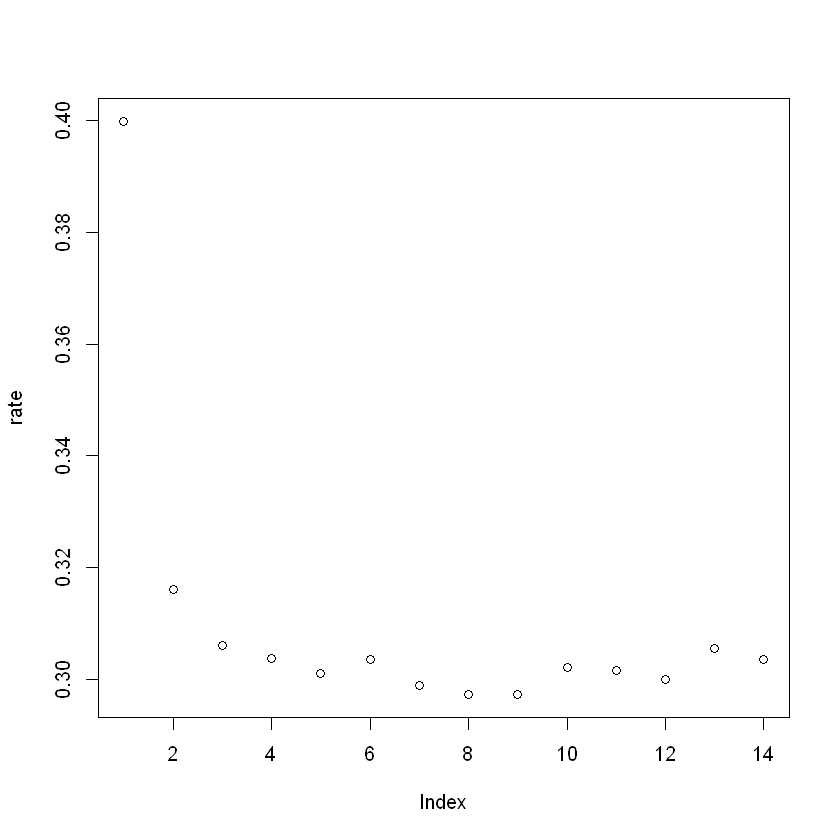

In [31]:
rate  
plot(rate)

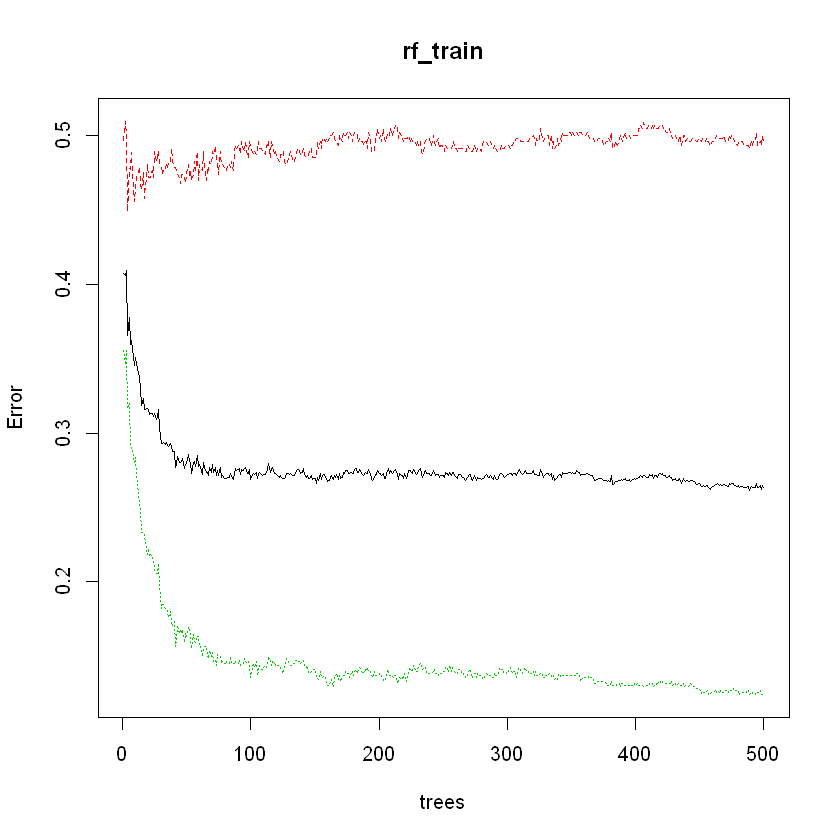

In [32]:
rf_train<-randomForest(as.factor(train$Y)~.,data=train,mtry=6)
plot(rf_train)    
legend(800,0.02,"Y=0",cex=0.9,bty="n")    
legend(800,0.0245,"total",cex=0.09,bty="n")   

In [33]:
set.seed(100)
rf_train<-randomForest(as.factor(train$Y)~.,data=as.data.frame(train),mtry = 5,importance=TRUE)
rf_train


Call:
 randomForest(formula = as.factor(train$Y) ~ ., data = as.data.frame(train),      mtry = 5, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 26.56%
Confusion matrix:
    0   1 class.error
0 229 233   0.5043290
1  95 678   0.1228978

In [34]:
rf_pred = predict(rf_train, newdata = test)
(rf_acc = round(sum(rf_pred == test$Y)/length(rf_pred),4))

[1] 0.7407

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Gender,-0.94994696,2.6888839,1.6031024,8.462156
s_start_year,22.42826905,44.7496459,50.2083422,103.392138
s_Citizenship,3.33690636,-0.2872437,1.7202484,7.796483
avs_net_cost,16.39205853,19.5609867,25.7581200,109.571979
Gender.1,0.09832524,1.0563201,0.8800277,8.560909
s_Average.Precol.GPA,-5.36231761,17.6583080,13.7144840,51.421642
s_GRE.Combined.General.Write.Score,-5.24916155,12.0971818,9.9621950,20.651359
s_GRE.Combined.Quantitative.Score,-2.08668881,10.0426864,8.6832481,32.761130
s_GRE.Combined.General.Verbal.Score,-5.34811737,10.4201950,5.8099718,29.975856
College,6.78977430,8.3278357,10.9726574,24.963315


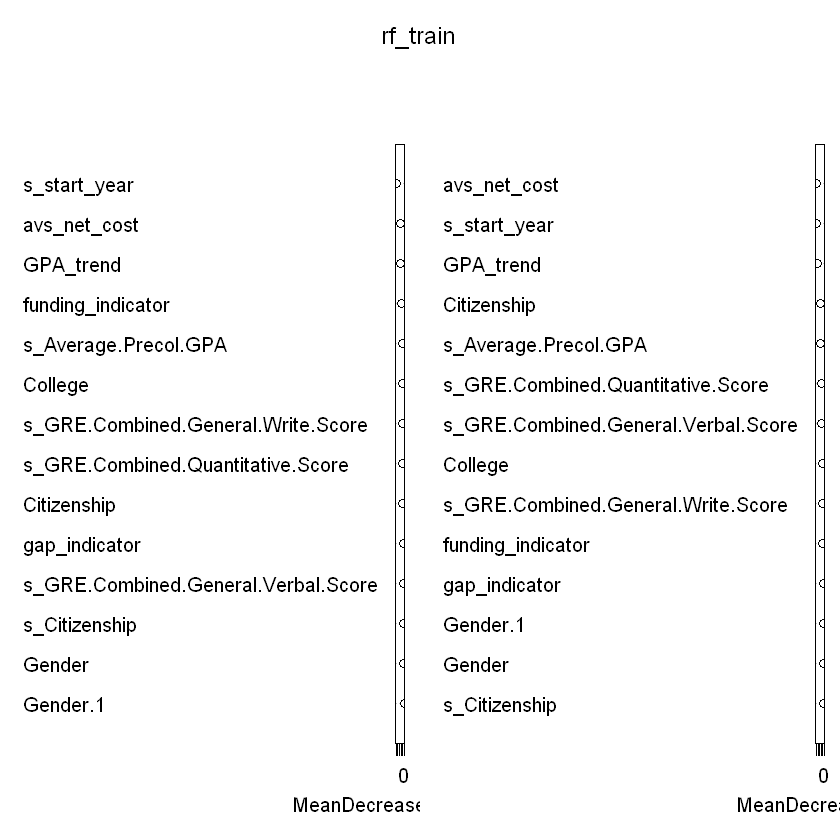

In [35]:
importance(rf_train)
varImpPlot(rf_train)

## LDA

In [36]:
mod_lda = lda(Y~., data = as.data.frame(train))
lda_pred = predict(mod_lda, newdata = test)

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

In [37]:
(lda_acc = round(sum(lda_pred$class == test$Y)/length(lda_pred$class),4))

[1] 0.7066

<b> Summary

In [57]:
mod_lda$scaling


,LD1
GenderMale,0.14731308
s_start_year,-0.92430614
s_CitizenshipAsia,-0.20222948
s_CitizenshipChina,-0.35693747
s_CitizenshipWhite,-0.83320332
avs_net_cost,0.01424697
Gender.1Male,0.14731308
s_Average.Precol.GPA,0.08068958
s_GRE.Combined.General.Write.Score,0.04153862
s_GRE.Combined.Quantitative.Score,-0.05187390


## Neural Network

In [39]:
nnet_vld = NULL
for (i in seq(1,20,1)){
    mod_nnet = nnet(Y~., data = train, size  = i,trace = FALSE, decay =.1, rang = 0, maxit = 250)
    nn_pred = predict(mod_nnet, newdata = vld)
    nn_pred = as.numeric(nn_pred>=.5)
    nnet_vld = c(nnet_vld, sum(nn_pred == vld$Y)/length(nn_pred))
}
(tr_size = which.max(nnet_vld))

[1] 2

In [40]:
mod_nnet = nnet(Y~., data = train, size  = tr_size,trace = FALSE, decay =.1, rang = 0, maxit = 250)
nn_pred = as.numeric(predict(mod_nnet, newdata = test)>= .5)

In [41]:
(nnet_acc = round(sum(nn_pred == test$Y)/length(nn_pred),4))

[1] 0.7002

<b> Summary

In [58]:
summary(mod_nnet)

a 30-2-1 network with 65 weights
options were - decay=0.1
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
   1.00    0.32   -1.51   -0.16   -0.12   -0.82   -0.39    0.32    0.28   -0.17 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
   0.35   -0.18   -1.33    1.23   -1.30    0.05    0.68    0.56    1.16   -0.16 
i20->h1 i21->h1 i22->h1 i23->h1 i24->h1 i25->h1 i26->h1 i27->h1 i28->h1 i29->h1 
  -0.29    0.75   -0.12    0.13   -0.61    0.99   -0.33   -0.93   -0.53    1.57 
i30->h1 
  -0.20 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   1.27    0.11   -1.30    0.20    0.05    0.09    1.13    0.11    0.01    0.13 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -0.68    0.11    0.52    0.50   -0.22   -0.32    0.37   -0.82    1.59    0.20 
i20->h2 i21->h2 i22->h2 i23->h2 i24->h2 i25->h2 i26->h2 i27->h2 i28->h2 i29->h2 
  -0.43    0.55    0.05   -0.51  

## Logistic Regression

In [43]:
mod_glm = glm(Y~., data = train, family=binomial())
glm_pred = as.numeric(predict(mod_glm, newdata = test, type="response") >= .5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [44]:
(glm_acc = round(sum(glm_pred == test$Y)/length(glm_pred),4))

[1] 0.7083

<b> Summary

In [45]:
summary(mod_glm)


Call:
glm(formula = Y ~ ., family = binomial(), data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.516  -1.078   0.644   0.933   1.841  

Coefficients: (4 not defined because of singularities)
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              0.90081    0.83117   1.084  0.27846
GenderMale                               0.25443    0.13870   1.834  0.06659
s_start_year                            -0.83023    0.08754  -9.484  < 2e-16
s_CitizenshipAsia                       -0.33510    0.55601  -0.603  0.54672
s_CitizenshipChina                      -0.55631    0.55761  -0.998  0.31844
s_CitizenshipWhite                      -1.02469    0.52923  -1.936  0.05285
avs_net_cost                             0.01619    0.05845   0.277  0.78186
Gender.1Male                                  NA         NA      NA       NA
s_Average.Precol.GPA                     0.06433    0.07193   0.894  0.37117
s_GRE.C

## SVM

In [46]:
mod_svm = svm(Y~., data = train, family=binomial())
svm_pred = as.numeric(predict(mod_svm, newdata = test, type="response") >= .5)

In [47]:
(svm_acc = round(sum(svm_pred == test$Y)/length(svm_pred),4))

[1] 0.7099

<b> Summary

In [48]:
summary(mod_svm)
colMeans(mod_svm$SV)
#The resulting support vectors (possibly scaled).


Call:
svm(formula = Y ~ ., data = train, family = binomial())


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03225806 
    epsilon:  0.1 


Number of Support Vectors:  996






GenderFemale                              GenderMale 
                            0.453815261                             0.546184739 
                           s_start_year                       s_CitizenshipAsia 
                            0.135009057                             0.128514056 
                     s_CitizenshipChina                      s_CitizenshipWhite 
                            0.129518072                             0.719879518 
                           avs_net_cost                            Gender.1Male 
                            0.006377183                             0.546184739 
                   s_Average.Precol.GPA      s_GRE.Combined.General.Write.Score 
                           -0.003188524                             0.022344776 
      s_GRE.Combined.Quantitative.Score     s_GRE.Combined.General.Verbal.Score 
                           -0.004320970                             0.012093157 
                    CollegeGD.Education                   CollegeGD.Grad.School 
                            0.028112450                             0.019076305 
                       CollegeGD.Harpur                    CollegeGD.Management 
                            0.654618474                             0.025100402 
                      CollegeGD.Nursing                        CollegeGD.Watson 
                            0.051204819                             0.210843373 
                      funding_indicator                         CitizenshipAsia 
                           -0.016657946                             0.128514056 
                       CitizenshipAsian    CitizenshipBlack.or.African.American 
                            0.042168675                             0.030120482 
                       CitizenshipChina                       CitizenshipEurope 
                            0.129518072                             0.022088353 
          CitizenshipHispanic.or.Latino                        CitizenshipIndia 
                            0.043172691                             0.045180723 
CitizenshipOther.International.Students                      CitizenshipUnknown 
                            0.014056225                             0.069277108 
                       CitizenshipWhite                           gap_indicator 
                            0.453815261                            -0.059891182 
                              GPA_trend 
                           -0.006829031

## LASSO

In [49]:
train_x = model.matrix(~., data = train_x)
test_x = model.matrix(~., data = test_x)

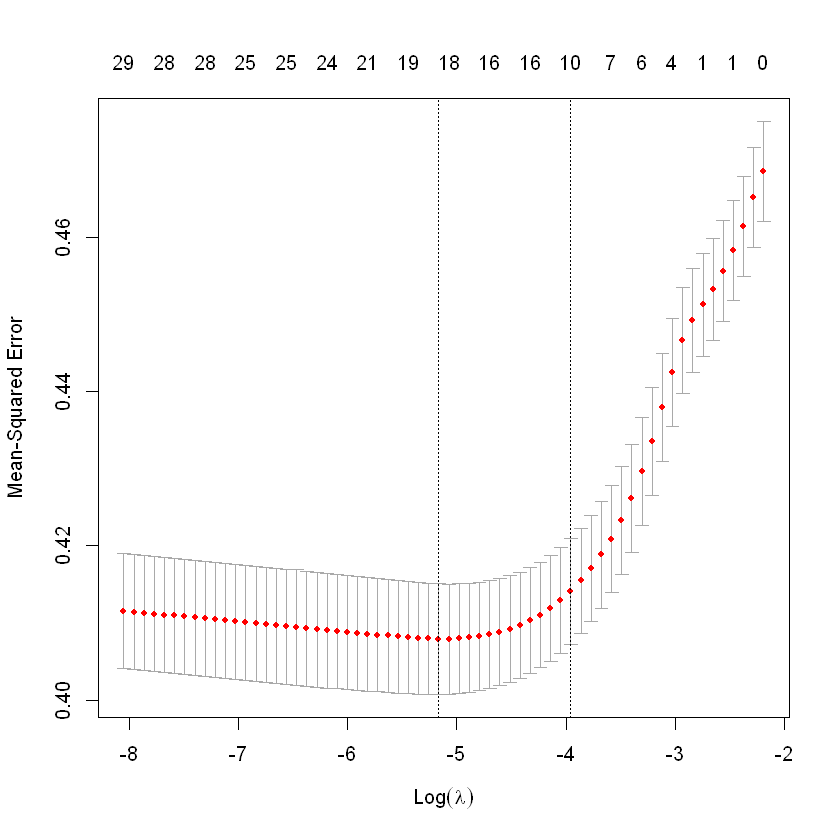

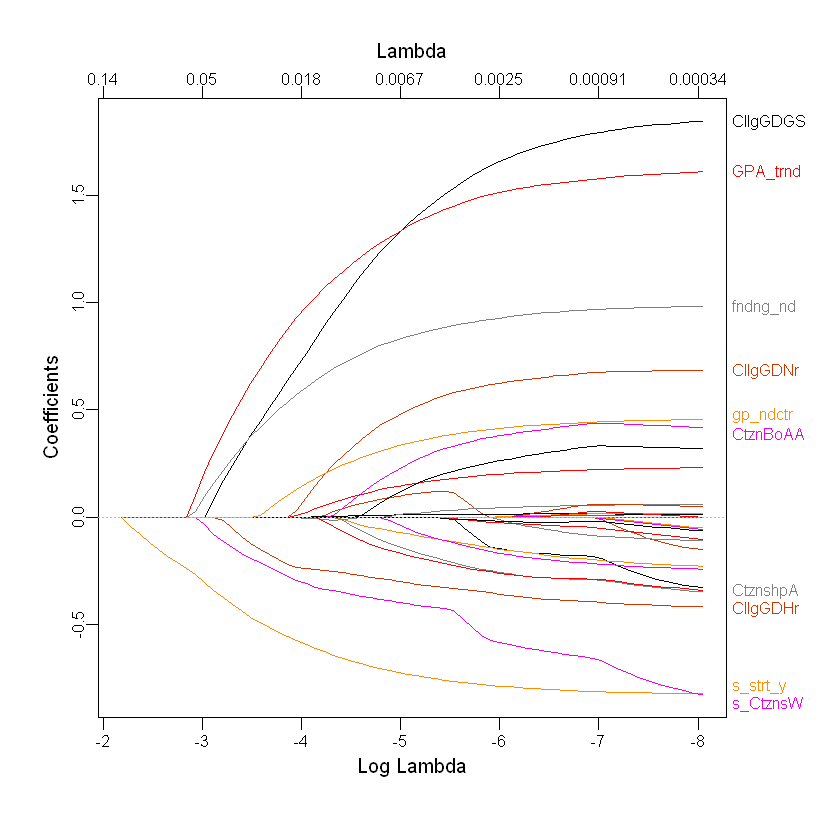

In [50]:
cvfit = cv.glmnet(train_x,train_y,alpha=1,family='binomial',type.measure='mse')
mod_lasso = glmnet(train_x,train_y,alpha=1, family = "binomial",lambda = cvfit$lambda)
plot(cvfit)
plot_glmnet(mod_lasso)
mod_lasso <- glmnet(train_x,train_y,alpha=1, family = "binomial",lambda = cvfit$lambda.min)

In [51]:
lasso_pred = predict(mod_lasso, test_x, type="class")
lasso_right = colSums(lasso_pred == test_y)
(lasso_acc = round(max(lasso_right)/length(test_y),4))

[1] 0.7034

<b> Summary

In [52]:
mod_lasso$beta

31 x 1 sparse Matrix of class "dgCMatrix"
                                                 s0
(Intercept)                              .         
GenderMale                               0.04754671
s_start_year                            -0.73787956
s_CitizenshipAsia                        0.10964696
s_CitizenshipChina                       .         
s_CitizenshipWhite                      -0.40851233
avs_net_cost                             .         
Gender.1Male                             0.12508201
s_Average.Precol.GPA                     0.02037294
s_GRE.Combined.General.Write.Score       .         
s_GRE.Combined.Quantitative.Score       -0.08369912
s_GRE.Combined.General.Verbal.Score      .         
CollegeGD Education                     -0.06812486
CollegeGD Grad School                    1.40124955
CollegeGD Harpur                        -0.31010775
CollegeGD Management                     .         
CollegeGD Nursing                        0.51693424
CollegeGD Watson      

## Prediction Summary

In [53]:
res = data.frame(rbind(rf_acc, lda_acc, nnet_acc, glm_acc,svm_acc,lasso_acc))
colnames(res) = 'Accuracy'
rownames(res) = c('Random Forest','LDA', 'Neural Network', 'Logistic Regression', 'SVM', 'LASSO')
res

,Accuracy
Random Forest,0.7407
LDA,0.7066
Neural Network,0.7002
Logistic Regression,0.7083
SVM,0.7099
LASSO,0.7034
